In [4]:
# Importing the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

In [5]:
# Load the DataSet

df = pd.read_csv("/Users/vinaykumar/Documents/HousePricePrediction1/Bengaluru_House_Data.csv")

In [6]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
# Check the shape of the dataset
print("Dataset shape:", df.shape)




Dataset shape: (13320, 9)


In [8]:
#Get column data types and non-null counts
print("\nDataSet info:")
df.info()



DataSet info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
#statistics of numerical columns
print("\nSummary statistics:")
df.describe()


Summary statistics:


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [10]:
# check how many missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [11]:
# Drop Columns not useful for prediction (ignore if not present)
df = df.drop(columns= ['society', 'availability'], axis=1)

# Display Remanining columns
df.columns


Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [12]:
# Drop rows with missing 'location' and 'size')
df = df.dropna(subset=['location', 'size'])

#Fill Missing 'bath' with median

df['bath'].fillna(df['bath'].median(), inplace=True)

# Fill Missing Balcony with mode
df['balcony'].fillna(df['balcony'].mode()[0], inplace=True)

# Verify no more Missing values

print("Remaining missing values: \n", df.isnull().sum())

Remaining missing values: 
 area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64


/var/folders/zt/1551br690cs36fmc1dw4qr5w0000gn/T/ipykernel_63769/3152102475.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].median(), inplace=True)
/var/folders/zt/1551br690cs36fmc1dw4qr5w0000gn/T/ipykernel_63769/3152102475.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

FEATURE EXTRACTION

In [13]:
# Create a new colums 'BHK'by extracting the number from 'size'

df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

# drop original 'size' column as it's no longer needed

df = df.drop(columns = ['size'])

# View the dataframe

df.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [14]:
#  Clean the Total_Sqft column convert them to float

def convert_sqft(x):

    try:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) /2
        else:
            return float(x)
    except:
        return None 
    
df['total_sqft'] = df['total_sqft']. apply(convert_sqft)

# drop the rows where total_sqft could not be converted
df = df.dropna(subset = ['total_sqft'])

df.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


Creating the Data Plots

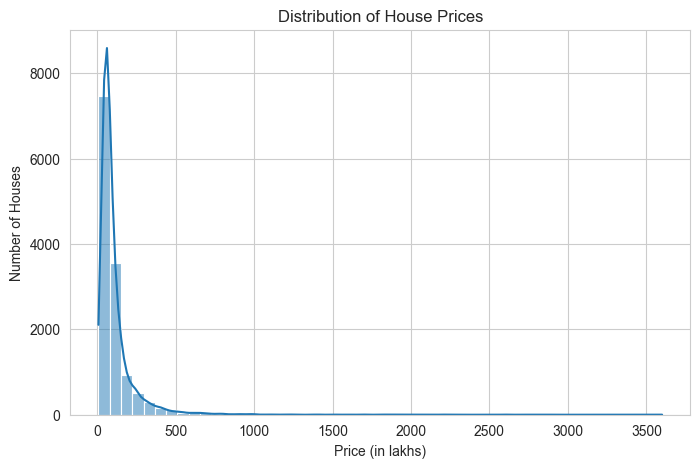

In [15]:
# Plot price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Number of Houses')
plt.show()


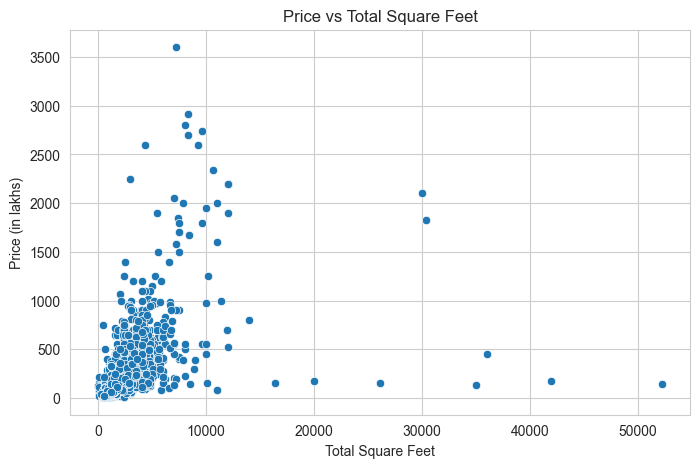

In [16]:
# Scatter plot of price vs total_sqft
plt.figure(figsize=(8,5))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Price vs Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in lakhs)')
plt.show()


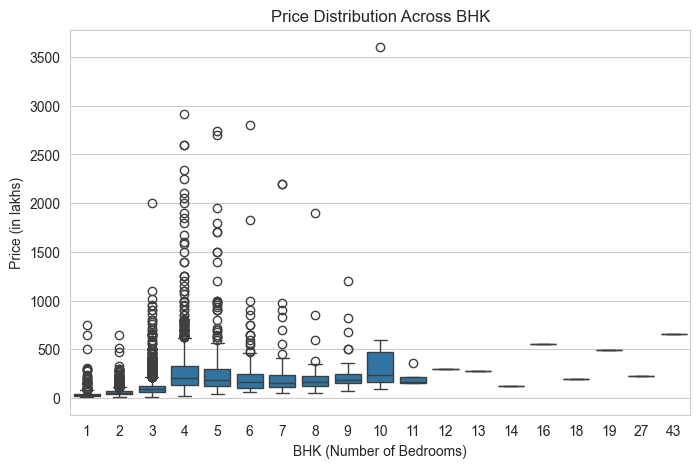

In [17]:
# Boxplot of price by BHK
plt.figure(figsize=(8,5))
sns.boxplot(x='BHK', y='price', data=df)
plt.title('Price Distribution Across BHK')
plt.xlabel('BHK (Number of Bedrooms)')
plt.ylabel('Price (in lakhs)')
plt.show()


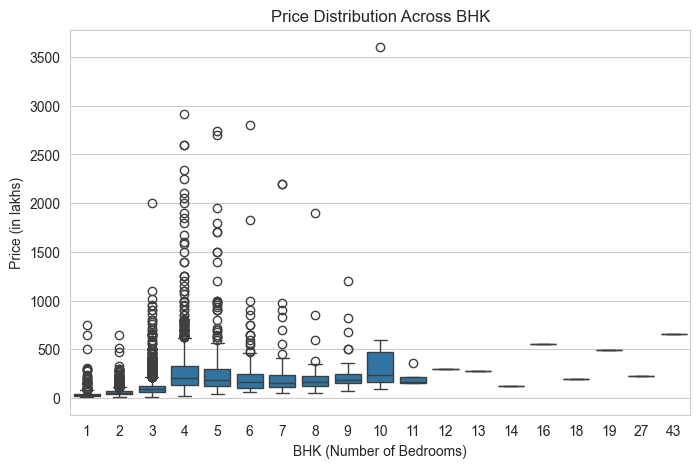

In [18]:
# Boxplot of price by BHK
plt.figure(figsize=(8,5))
sns.boxplot(x='BHK', y='price', data=df)
plt.title('Price Distribution Across BHK')
plt.xlabel('BHK (Number of Bedrooms)')
plt.ylabel('Price (in lakhs)')
plt.show()


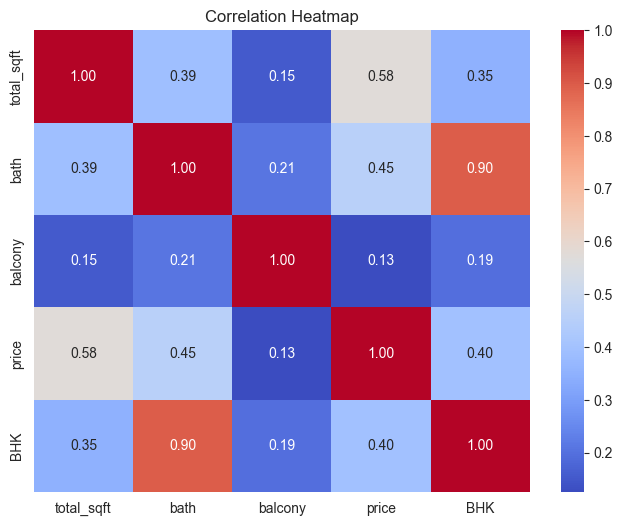

In [19]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Linear Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])
df['area_type'] = le.fit_transform(df['area_type'])

X = df.drop(columns=['price'])
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.46736848818441534
RMSE: 107.87799124860614


RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Random Forest Results")
print("R2 Score:", rf_r2)
print("RMSE:", rf_rmse)


Random Forest Results
R2 Score: 0.6388187851495588
RMSE: 88.8345690483991


Decission Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor

# Create and train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
dt_pred = dt_model.predict(X_test)

# Evaluate
dt_r2 = r2_score(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

print("Decision Tree Results")
print("R2 Score:", dt_r2)
print("RMSE:", dt_rmse)


Decision Tree Results
R2 Score: 0.5411360012295617
RMSE: 100.12935425479563


Gradient Boosting Regressor

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict
gb_pred = gb_model.predict(X_test)

# Evaluate
gb_r2 = r2_score(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))

print("Gradient Boosting Results")
print("R2 Score:", gb_r2)
print("RMSE:", gb_rmse)


Gradient Boosting Results
R2 Score: 0.607659633709708
RMSE: 92.58719334178757


Support Vector Machine Learning

In [31]:
from sklearn.svm import SVR

# Create and train SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict
svr_pred = svr_model.predict(X_test)

# Evaluate
svr_r2 = r2_score(y_test, svr_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))

print("SupportVectorRegression Results")
print("R2 Score:", svr_r2)
print("RMSE:", svr_rmse)


SupportVectorRegression Results
R2 Score: 0.25390102004216375
RMSE: 127.67846293287803


In [ ]:
# Train Multiple Models and Compare

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Dictionary to store results
results = {}

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
results['Random Forest'] = {
    'R2 Score': r2_score(y_test, rf_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred))
}

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
results['Decision Tree'] = {
    'R2 Score': r2_score(y_test, dt_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, dt_pred))
}

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
results['Gradient Boosting'] = {
    'R2 Score': r2_score(y_test, gb_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, gb_pred))
}

svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
results['SVR'] = {
    'R2 Score': r2_score(y_test, svr_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, svr_pred))
}

results['Linear Regression'] = {
    'R2 Score': r2_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
}


import pandas as pd
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R2 Score", ascending=False, inplace=True)
display(results_df)


,R2 Score,RMSE
Random Forest,0.638819,88.834569
Gradient Boosting,0.607660,92.587193
Decision Tree,0.541136,100.129354
Linear Regression,0.467368,107.877991
SVR,0.253901,127.678463


Serialization